In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Statistik/data_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.shape

(569, 33)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
#Cek Missing Values
print(df.isnull().sum(), '\n')
print('Terdapat {} Missing Values dalam Dataset'.format(df.isnull().sum().sum()))

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [20]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [21]:
#Cek Statistical Insight
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Machine Learning Model**

**Data Preprocessing**

In [24]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
scaler = StandardScaler()
scaler2 = PowerTransformer(method='Box-Cox', standardize=True)

In [26]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [27]:
X_scaled = scaler.fit_transform(X.values)
#y_scaled = scaler.fit(y.values)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5)
rf.fit(X_train, y_train)

prediksi_rf = rf.predict(X_train)

In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [32]:
print(f1_score(y_train, prediksi_rf, average='macro'))
print(precision_score(y_train, prediksi_rf, average='macro'))
print(recall_score(y_train, prediksi_rf, average='macro'))

0.9929136924075275
0.9948096885813149
0.9911242603550297


In [33]:
prediksi_rf = rf.predict(X_test)

In [34]:
print('Akurasi Random Forest pada Testing Set adalah :', round(rf.score(X_test, y_test),2))
print(f1_score(y_test, prediksi_rf, average='macro'))
print(precision_score(y_test, prediksi_rf, average='macro'))
print(recall_score(y_test, prediksi_rf, average='macro'))

Akurasi Random Forest pada Testing Set adalah : 0.96
0.9623015873015873
0.9672569328433009
0.9580740255486406


In [35]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



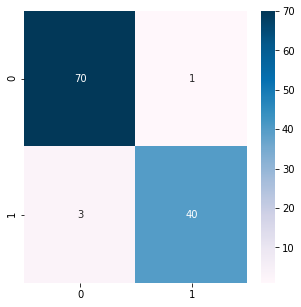

In [36]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.show()

Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
prediksi_lr = lr.predict(X_train)

In [39]:
print(f1_score(y_train, prediksi_lr, average='macro'))
print(precision_score(y_train, prediksi_lr, average='macro'))
print(recall_score(y_train, prediksi_lr, average='macro'))

0.9858449477351916
0.9870675316034598
0.9846691769768693


In [40]:
prediksi_lr = lr.predict(X_test)

In [41]:
print('Akurasi Logistic Regression pada Testing Set adalah :', round(lr.score(X_test, y_test),2))
print(f1_score(y_test, prediksi_lr, average='macro'))
print(precision_score(y_test, prediksi_lr, average='macro'))
print(recall_score(y_test, prediksi_lr, average='macro'))

Akurasi Logistic Regression pada Testing Set adalah : 0.97
0.97186343068696
0.9742063492063492
0.9697019325253848


In [42]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



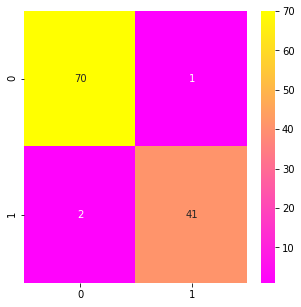

In [43]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='spring')
plt.show()

K-Nearest Neighbor

In [44]:
from sklearn.neighbors import KNeighborsClassifier

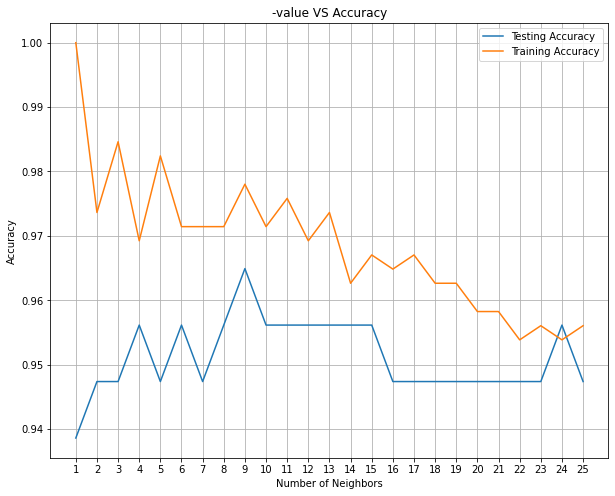


Nilai Akurasi terbaik untuk Model KNN adalah 0.9649122807017544 dengan nilai K = 9


In [45]:
neig = np.arange(1, 26)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[10,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Akurasi terbaik untuk Model KNN adalah {} dengan nilai K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

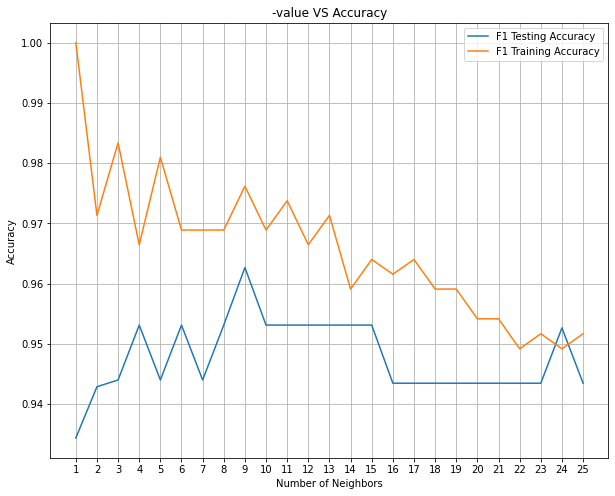


Nilai F1 Score terbaik untuk Model KNN adalah 0.9626596790042581 dengan nilai K = 9


In [46]:
neig = np.arange(1, 26)
f1_train_accuracy = []
f1_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  f1_train_accuracy.append(f1_score(y_train, prediksi_knn_train, average='macro'))
  f1_test_accuracy.append(f1_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, f1_test_accuracy, label = 'F1 Testing Accuracy')
plt.plot(neig, f1_train_accuracy, label = 'F1 Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai F1 Score terbaik untuk Model KNN adalah {} dengan nilai K = {}".format(np.max(f1_test_accuracy),1+f1_test_accuracy.index(np.max(f1_test_accuracy))))

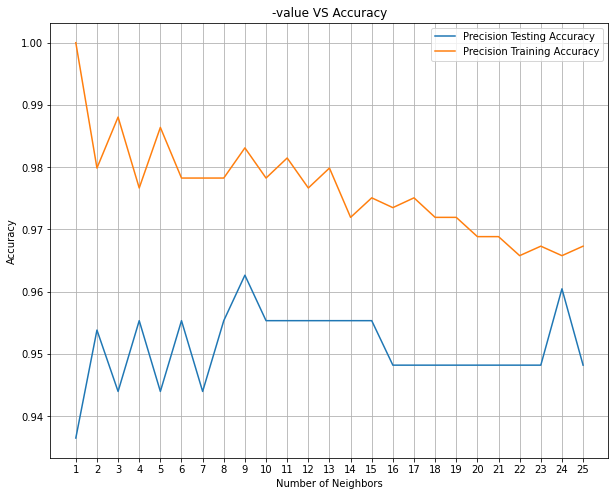


Nilai Precision terbaik untuk Model KNN adalah 0.9626596790042581 untuk nilai K = 9


In [47]:
neig = np.arange(1, 26)
precision_train_accuracy = []
precision_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  precision_train_accuracy.append(precision_score(y_train, prediksi_knn_train, average='macro'))
  precision_test_accuracy.append(precision_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, precision_test_accuracy, label = 'Precision Testing Accuracy')
plt.plot(neig, precision_train_accuracy, label = 'Precision Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Precision terbaik untuk Model KNN adalah {} untuk nilai K = {}".format(np.max(precision_test_accuracy),1+precision_test_accuracy.index(np.max(precision_test_accuracy))))

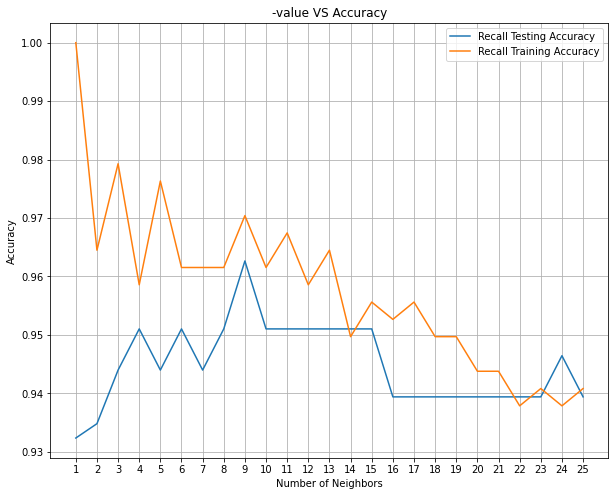


Nilai Recall Score terbaik untuk Model KNN adalah 0.9626596790042581 dengan K = 9


In [48]:
neig = np.arange(1, 26)
recall_train_accuracy = []
recall_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  recall_train_accuracy.append(recall_score(y_train, prediksi_knn_train, average='macro'))
  recall_test_accuracy.append(recall_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, recall_test_accuracy, label = 'Recall Testing Accuracy')
plt.plot(neig, recall_train_accuracy, label = 'Recall Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Recall Score terbaik untuk Model KNN adalah {} dengan K = {}".format(np.max(recall_test_accuracy),1+recall_test_accuracy.index(np.max(recall_test_accuracy))))

Support Vector Machine Classifiers

In [49]:
from sklearn.svm import SVC

In [50]:
svmc = SVC(kernel='poly')
svmc.fit(X_train, y_train)
prediksi_svm_train = svmc.predict(X_train)

In [51]:
print(f1_score(y_train, prediksi_svm_train, average='macro'))
print(precision_score(y_train, prediksi_svm_train, average='macro'))
print(recall_score(y_train, prediksi_svm_train, average='macro'))

0.897534342885077
0.9373088685015291
0.8786982248520709


In [52]:
prediksi_svm_test = svmc.predict(X_test)

print('Accuracy of SVM with Polynomial Kernel on test set: {:.2f}'.format(svmc.score(X_test, y_test)))
print('F1 Score Test Data   :', f1_score(y_test, prediksi_svm_test, average='macro'))
print('Precision Test Data  :', precision_score(y_test, prediksi_svm_test, average='macro'))
print('Recall Test Data     :', recall_score(y_test, prediksi_svm_test, average='macro'))

Accuracy of SVM with Polynomial Kernel on test set: 0.87
F1 Score Test Data   : 0.846595496546156
Precision Test Data  : 0.9127906976744187
Recall Test Data     : 0.8255813953488372


In [53]:
y_pred_svmc = svmc.predict(X_test)
print(classification_report(y_test, y_pred_svmc))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90        71
           1       1.00      0.65      0.79        43

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114



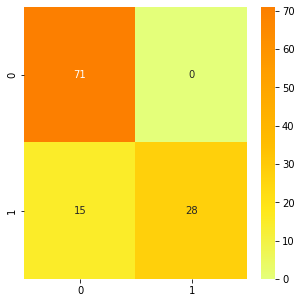

In [54]:
cm = confusion_matrix(y_test, y_pred_svmc)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Wistia')
plt.show()